# Case Study - Analyse the data of quarterly shipments transfer of a certain courier company in the $20^{th}$ century.

#### Basic Libraries import

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize']=10,9
import seaborn as sns

## 1. Read the data in a quarterly Time Series Format.

In [4]:
df=pd.read_csv('ApplianceShipments.csv')
df.head()

,Quarter,Year,Shipments
0,Q1,1985,4009
1,Q2,1985,4321
2,Q3,1985,4224
3,Q4,1985,3944
4,Q1,1986,4123


In [7]:
df['Year'].max()

1989

In [14]:
date=pd.date_range(start='1/1/1985',end='1/1/1990',freq='Q')
date

DatetimeIndex(['1985-03-31', '1985-06-30', '1985-09-30', '1985-12-31',
               '1986-03-31', '1986-06-30', '1986-09-30', '1986-12-31',
               '1987-03-31', '1987-06-30', '1987-09-30', '1987-12-31',
               '1988-03-31', '1988-06-30', '1988-09-30', '1988-12-31',
               '1989-03-31', '1989-06-30', '1989-09-30', '1989-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [12]:
df['Time_stamp']=date
df.head()

,Quarter,Year,Shipments,Time_stamp
0,Q1,1985,4009,1985-03-31
1,Q2,1985,4321,1985-06-30
2,Q3,1985,4224,1985-09-30
3,Q4,1985,3944,1985-12-31
4,Q1,1986,4123,1986-03-31


In [17]:
df.set_index('Time_stamp',drop=True,inplace=True)
df.head()

,Quarter,Year,Shipments
Time_stamp,,,
1985-03-31,Q1,1985,4009
1985-06-30,Q2,1985,4321
1985-09-30,Q3,1985,4224
1985-12-31,Q4,1985,3944
1986-03-31,Q1,1986,4123


In [19]:
df.drop(['Quarter','Year'],axis=1,inplace=True)
df.head()

,Shipments
Time_stamp,
1985-03-31,4009
1985-06-30,4321
1985-09-30,4224
1985-12-31,3944
1986-03-31,4123


## 2. Plot the Time Series data.

<AxesSubplot:xlabel='Time_stamp'>

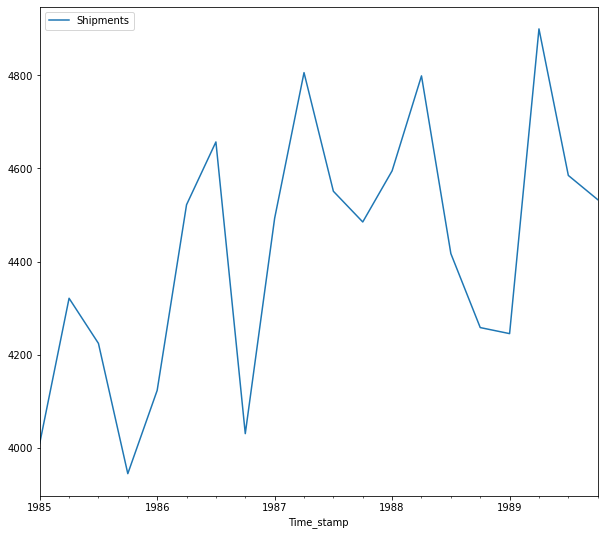

In [23]:
df.plot()

## Find the basic measures of descriptive statistics for this time series across quarters of different years.

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Shipments,20.0,4424.85,274.089358,3944.0,4239.75,4489.0,4587.5,4900.0


## 3. Plot the Time series along with the mean and median of the Time series in the graph to get an understanding of the fluctuation of the data from these two measures of central tendency.

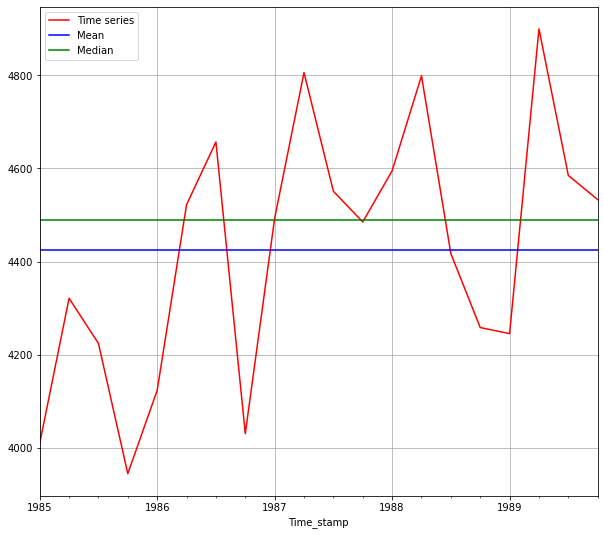

In [34]:
df.plot(color='red')
plt.axhline(df['Shipments'].mean(),color='blue')
plt.axhline(df['Shipments'].median(),color='green')
plt.grid()
plt.legend(['Time series','Mean','Median'])
plt.show()

## 4. Plot a quarterly comparison of the shipments using a barplot.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time_stamp', ylabel='Shipments'>

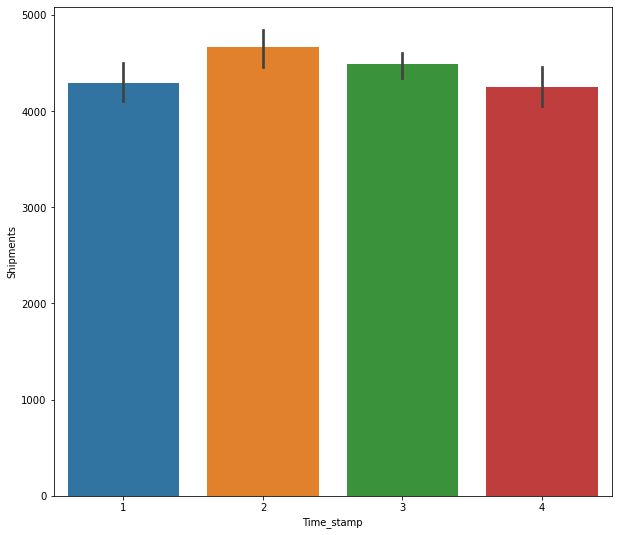

In [45]:
sns.barplot(df.index.quarter,df['Shipments'])

## 5. Plot the year on year quarterly comparison of the shipments.

In [48]:
df.index.month_name

<bound method inherit_from_data.<locals>.method of DatetimeIndex(['1985-03-31', '1985-06-30', '1985-09-30', '1985-12-31',
               '1986-03-31', '1986-06-30', '1986-09-30', '1986-12-31',
               '1987-03-31', '1987-06-30', '1987-09-30', '1987-12-31',
               '1988-03-31', '1988-06-30', '1988-09-30', '1988-12-31',
               '1989-03-31', '1989-06-30', '1989-09-30', '1989-12-31'],
              dtype='datetime64[ns]', name='Time_stamp', freq=None)>

In [54]:
yr_yr_comp=pd.pivot_table(df,values='Shipments',columns=df.index.month_name(),index=df.index.year)

In [58]:
yr_yr_comp

Time_stamp,December,June,March,September
Time_stamp,,,,
1985,3944,4321,4009,4224
1986,4030,4522,4123,4657
1987,4485,4806,4493,4551
1988,4258,4799,4595,4417
1989,4533,4900,4245,4585


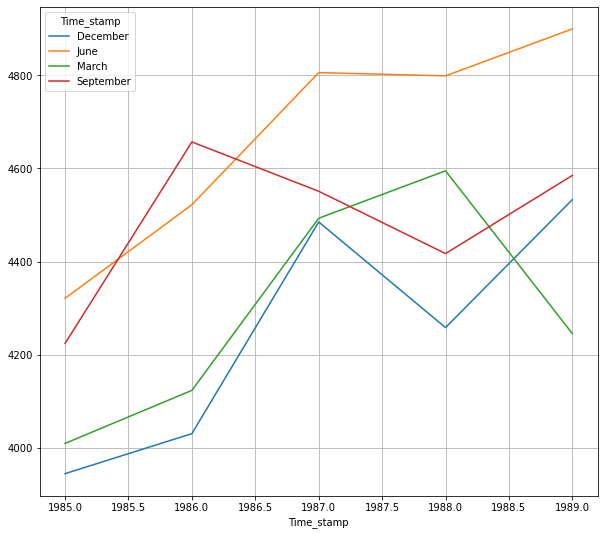

In [57]:
yr_yr_comp.plot()
plt.grid()

## 6. Plot the distribution plot for quarterly comparison of the shipments.

In [78]:
df.loc[df.index.quarter == 1]

,Shipments
Time_stamp,
1985-03-31,4009
1986-03-31,4123
1987-03-31,4493
1988-03-31,4595
1989-03-31,4245


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

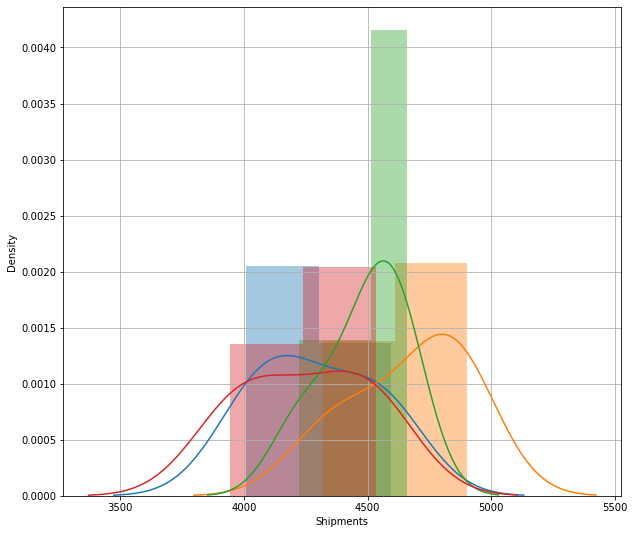

In [66]:
sns.distplot(df.loc[df.index.quarter == 1]['Shipments'])
sns.distplot(df.loc[df.index.quarter == 2]['Shipments'])
sns.distplot(df.loc[df.index.quarter == 3]['Shipments'])
sns.distplot(df.loc[df.index.quarter == 4]['Shipments'])
plt.grid();

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

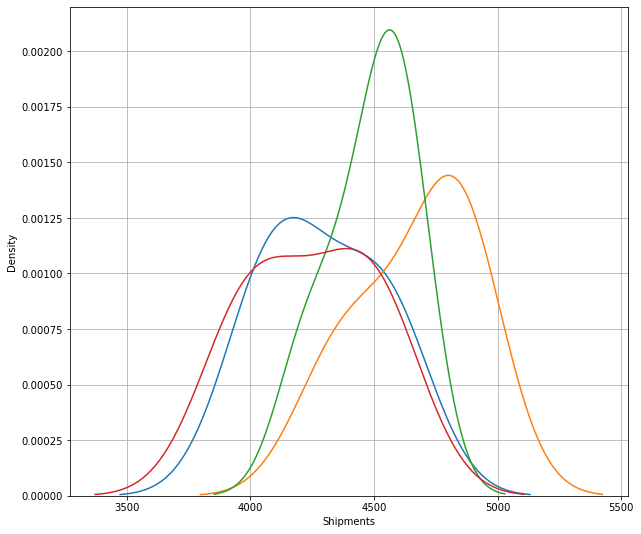

In [70]:
sns.distplot(df.loc[df.index.quarter == 1]['Shipments'],hist=False)
sns.distplot(df.loc[df.index.quarter == 2]['Shipments'],hist=False)
sns.distplot(df.loc[df.index.quarter == 3]['Shipments'],hist=False)
sns.distplot(df.loc[df.index.quarter == 4]['Shipments'],hist=False)
plt.grid();

## 7. Decompose the data and check the trend, seasonality and the irregular/residual/error component.

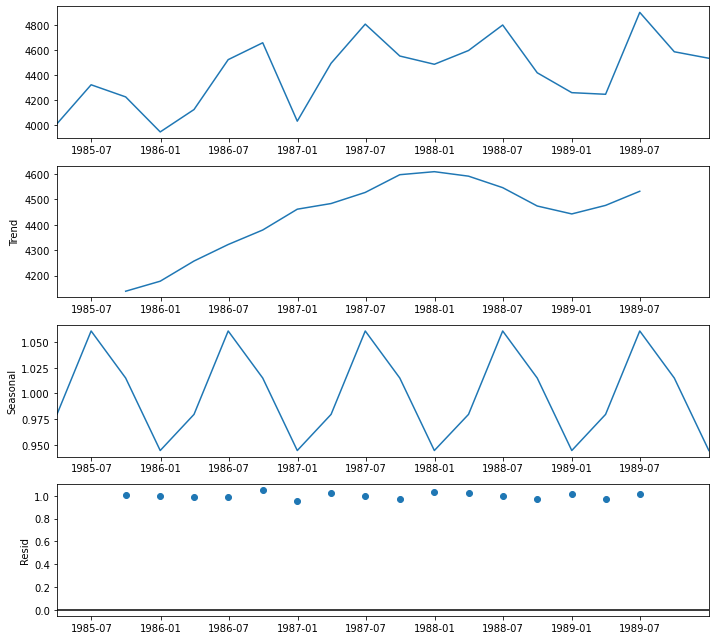

In [74]:
decompose=seasonal_decompose(df,model='multiplicative')
decompose.plot();

Go ahead and play around with the data to understand the nuances. Try to perform different types of visualizations in order for better understanding of the data. 

Happy Learning!

# END